Enter           enter edit mode                 Shift-­Enter     run cell, select below
Ctrl-Enter      run cell                        Alt-Enter       run cell, insert below
Y               to code                         M               to markdown
R               to raw                          1               to heading 1
2,3,4,5,6       to heading 2,3,4,5,6            Up/K            select cell above
Down/J          select cell below               A/B             insert cell above/­below
X               cut selected cell               C               copy selected cell
Shift-V         paste cell above                V               paste cell below
Z               undo last cell deletion         D,D             delete selected cell
Shift-M         merge cell below                Ctrl-S          Save and Checkpoint
L               toggle line numbers             O               toggle output
Shift-O         toggle output scrolling         Esc             close pager
H               show keyboard shortcut help     I,I             interrupt kernel
0,0             restart kernel                  Space           scroll down
Shift-­Space     scroll up                       Shift           ignore

Edit Mode (press Enter to enable)
Tab                 code completion or indent   Shift-Tab           tooltip
Ctrl-]              indent                      Ctrl-[              dedent
Ctrl-A              select all                  Ctrl-Z              undo
Ctrl-S­hift-Z        redo                        Ctrl-Y              redo
Ctrl-Home           go to cell start            Ctrl-Up             go to cell start
Ctrl-End            go to cell end              Ctrl-Down           go to cell end
Ctrl-Left           go one word left            Ctrl-Right          go one word right
Ctrl-B­ack­space      delete word before          Ctrl-D­elete         delete word after
Esc                 command mode                Ctrl-M              command mode
Shift-­Enter         run cell, select below      Ctrl-Enter          run cell
Alt-Enter           run cell, insert below      Ctrl-S­hif­t-S­ubtract split cell
Ctrl-S­hift--        split cell                  Ctrl-S              Save and Checkpoint
Ctrl-/              toggle comment on current or selected lines

In [82]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

path = '/home/collin/machine_learning/CS6140ML18Fall-smith.colin/midterm/data/'
data_file = 'data_abalone.txt' 

/home/collin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
data = pd.read_csv(path+data_file, delimiter=',', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole Wt', 'Shucked Wt', 'Viscera Wt', 'Shell Wt', 'Rings'])

This is a very clean dataset. Not much to add or manipulate. 

I am going to try two datasets. One with all of the groups and one with [Length, Shucked Wt, Viscera Wt] removed. Using the correlation table below the weights are all cross correlative though the Shell Weight is actually not that bad so I am leaving it in. Length and Diameter however approach 1. So I am dropping one of those in the second set.

I also need to one hot the Sex column because it is not useful as an object and drop that column afterwords. 

In [11]:
data.corr()

,Length,Diameter,Height,Whole Wt,Shucked Wt,Viscera Wt,Shell Wt,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Wt,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Wt,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Wt,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Wt,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex           4177 non-null object
Length        4177 non-null float64
Diameter      4177 non-null float64
Height        4177 non-null float64
Whole Wt      4177 non-null float64
Shucked Wt    4177 non-null float64
Viscera Wt    4177 non-null float64
Shell Wt      4177 non-null float64
Rings         4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [51]:
# enc = OneHotEncoder(handle_unknown = 'ignore')
data_dummies = pd.get_dummies(data['Sex'])
data = pd.concat([data, data_dummies], axis=1)
data = data.drop(columns=['Sex'])


I commented these scatter plots out but they gave some insight into theeir relation to the Rings column.

In [52]:
# names=['Length', 'Diameter', 'Height', 'Whole Wt', 'Shucked Wt', 'Viscera Wt', 'Shell Wt', 'Rings']
# for name in names:
#     data.plot(kind='scatter', x=name, y='Rings')

In [53]:
reg = linear_model.LinearRegression()
log = linear_model.LogisticRegression()

As I continue to look up things everyone already knows I got to StandardScalar. And normalizer. 

In [76]:
data_y = data['Rings']

scaler = StandardScaler()
cols = data.columns.tolist()
dataxX = pd.DataFrame(scaler.fit_transform(data))
dataxX.columns = cols

data1 = data.drop(columns=['Rings'])
data2 = data.drop(columns=['Shucked Wt', 'Viscera Wt', 'Length', 'Rings'])
datax = dataxX.drop(columns=['Rings'])

In [55]:
hist_y = []
for i in range (30):
    hist_y.append(0)
for i in range (len(data_y)):
    hist_y[data_y[i]] += 1
    
hist_y

[0,
 1,
 1,
 15,
 57,
 115,
 259,
 391,
 568,
 689,
 634,
 487,
 267,
 203,
 126,
 103,
 67,
 58,
 42,
 32,
 26,
 14,
 6,
 9,
 2,
 1,
 1,
 2,
 0,
 1]

Given the above array we have 689, 634, 568, 487, 391 as the top 5 years.  We can get 2769 +/-2 years by guessing 9 and including 10, 8, 11, 7 and get 66%.

We will set that for baseline to judge usefulness.

In [56]:
(689+634+568+487+391) / 4177

0.6629159683983721

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data1, data_y, test_size=0.2, random_state=4)
x2_train, x2_test, y2_train, y2_test = train_test_split(data2, data_y, test_size=0.2, random_state=4)

At this point the data is set up. The answer column was dropped. There are 2 data sets one with all of the columns and another with three columns that had strong cross correlation dropped. I have divided them into two test/training sets.

I have a linear regression model and a logistic regression model set up. Time to fit and predict!

In [58]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

reg.fit(x2_train, y2_train)
y2_pred = reg.predict(x2_test)

log.fit(x_train, y_train)
log_y_pred = log.predict(x_test)

log.fit(x2_train, y2_train)
log2_y_pred = log.predict(x2_test)

I wrote a class called Result. I posted the code on Piazza and it is in a .py file right next to this notebook. I am importing it here and created a Result book for each of the regression predictions here. 

In [59]:
from result_lib import Result

lin_one_result = Result(y_pred, y_test.values, 1)
lin_two_result = Result(y2_pred, y2_test.values, 1)

log_one_result = Result(log_y_pred, y_test.values, 1)
log_two_result = Result(log2_y_pred, y2_test.values, 1)


The first tool the class I wrote gave me is a way to see basic numbers. What is the range, the number that are within that range of the predicted value, and most importantly the mean variance, i.e. how far off the guess was.

In [60]:
lin_two_result.display_totals()

Range: 1
Correct: 349
Mean Variance: 1.6071597772168658


In [61]:
lin_one_result.display_totals()

Range: 1
Correct: 371
Mean Variance: 1.5688643029663671


In [62]:
log_one_result.display_totals()

Range: 1
Correct: 517
Mean Variance: 1.686602870813397


In [63]:
log_two_result.display_totals()

Range: 1
Correct: 516
Mean Variance: 1.7141148325358853


While that will eventually be useful this next tool is at the moment the best one for taking next steps. I make a list of the natural values of the variances I plot on the X and I can plot them against the true values which I put on the Y. i.e. For each true value I can show how far off and in which direction the regression erred. 

After taking one look at the graphs the next step is not so obvious. 

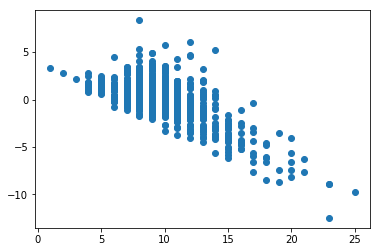

In [64]:
plt.plot(y2_test.values, lin_two_result.list_variances, 'o')

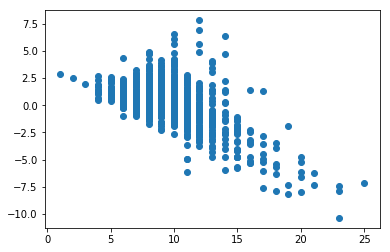

In [65]:
plt.plot(y_test.values, lin_one_result.list_variances, 'o')

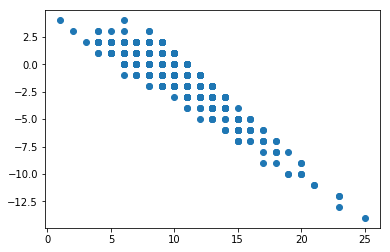

In [66]:
plt.plot(y_test.values, log_one_result.list_variances, 'o')

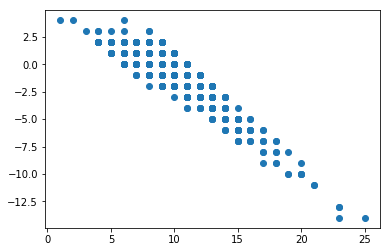

In [67]:
plt.plot(y_test.values, log_two_result.list_variances, 'o')

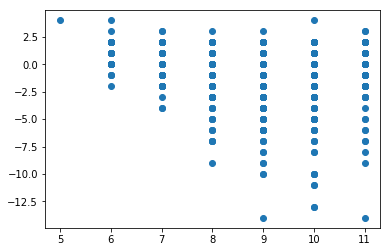

In [68]:
plt.plot(log2_y_pred, log_two_result.list_variances, 'o')

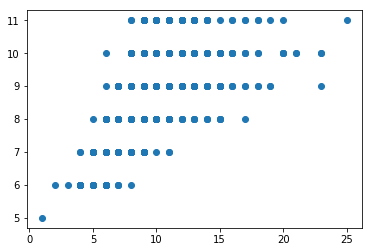

In [69]:
plt.plot(y_test.values, log2_y_pred, 'o')

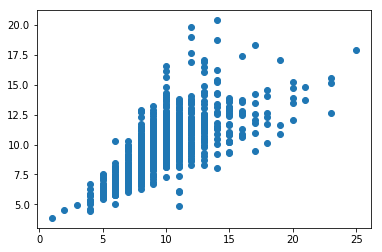

In [70]:
plt.plot(y_test.values, y_pred, 'o')

After looking at the graphs and judging by performance here is the following observation:

Abalone are all very much the same size. 

Deep I know.

The graph just above this is a plot of the predicted values versus the actual values for the second linear regression. At the age of 5 we predict a little low on age. At the age of 7-12 we are very close. After that we predict they are 10 or 11. I think they just stop growing. Looking at the given data everything has to do with size. 

Below I use the get confidence tool and I see linear one drops us from +/-2 to +/-1.67 to get 66%. They both get to 73% at +/-2 so it is slightly better than noise.

Both log regressions get 80% at +/-2 rather than 66%

Judging these Linear Regression using the entire dataset seems to perform the best. 

Below I use the result class to get confidence intervals near +/-2. 

In [34]:
lin_two_result.get_confidence_interval(73)

1.9982497618732893

In [35]:
lin_one_result.get_confidence_interval(73)

1.9383412434271712

In [36]:
log_two_result.get_confidence_interval(80)

2

In [37]:
log_one_result.get_confidence_interval(80)

2

In [38]:
cv_lin2 = cross_val_score(reg, data2, data_y, cv=5)
cv_lin1 = cross_val_score(reg, data1, data_y, cv=5)
# cv_log2 = cross_val_score(log, data2, data_y, cv=5)
# cv_log1 = cross_val_score(log, data1, data_y, cv=5)

This section is going to be about implementing Support Vector Machines. 

Basic first and using the one-to-one .SCV classifier.

In [39]:
svm_lin1 = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
svm_lin2 = svm.SVC(kernel='linear', C=1).fit(x2_train, y2_train)

In [40]:
svm_lin1.score(x_test, y_test)

0.26435406698564595

In [41]:
svm_lin2.score(x2_test, y2_test)

0.25478468899521534

This makes no sense. So Result.

In [42]:
svm_pred1 = svm_lin1.predict(x_test)
svm_pred2 = svm_lin2.predict(x2_test)

svm1_result = Result(svm_pred1, y_test.values, 1)
svm2_result = Result(svm_pred2, y2_test.values, 1)

In [43]:
svm1_result.display_totals()

Range: 1
Correct: 539
Mean Variance: 1.604066985645933


In [44]:
svm2_result.display_totals()

Range: 1
Correct: 540
Mean Variance: 1.6602870813397128


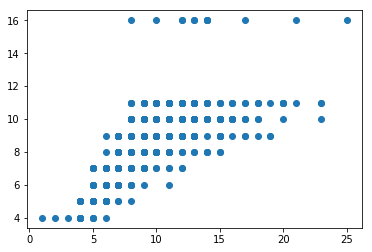

In [45]:
plt.plot(y_test.values, svm_pred1, 'o')

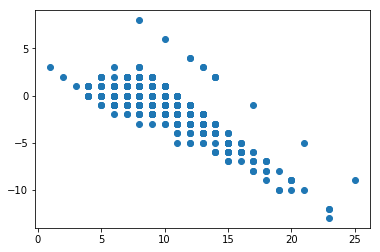

In [46]:
plt.plot(y_test.values, svm1_result.list_variances, 'o')

Same pattern. The predictions guess too high on young specimens and too low on old.

Mostly too low on old. 

There are a lot of SVM options and a variety of ways to format them so I am going to try something a little different. 

In [47]:
x_trains = [x_train, x2_train]
y_trains = [y_train, y2_train]
kernals = ['linear', 'rbf', 'sigmoid']

for krnl in kernals:
    for power in range(-5, 10):
        svm_temp = svm.SVC(kernel=krnl, C=2**power).fit(x_train, y_train)
        y_pred=svm_temp.predict(x_test)
        res_temp = Result(y_pred, y_test.values, 1)
        print('Kernal: ' + krnl + '  C: 2**' + str(power))
        res_temp.display_totals()


Kernal: linear  C: 2**-5
Range: 1
Correct: 537
Mean Variance: 1.6782296650717703
Kernal: linear  C: 2**-4
Range: 1
Correct: 534
Mean Variance: 1.6614832535885167
Kernal: linear  C: 2**-3
Range: 1
Correct: 535
Mean Variance: 1.6483253588516746
Kernal: linear  C: 2**-2
Range: 1
Correct: 538
Mean Variance: 1.624401913875598
Kernal: linear  C: 2**-1
Range: 1
Correct: 539
Mean Variance: 1.611244019138756
Kernal: linear  C: 2**0
Range: 1
Correct: 539
Mean Variance: 1.604066985645933
Kernal: linear  C: 2**1
Range: 1
Correct: 539
Mean Variance: 1.6088516746411483
Kernal: linear  C: 2**2
Range: 1
Correct: 540
Mean Variance: 1.605263157894737
Kernal: linear  C: 2**3
Range: 1
Correct: 543
Mean Variance: 1.605263157894737
Kernal: linear  C: 2**4
Range: 1
Correct: 545
Mean Variance: 1.5921052631578947
Kernal: linear  C: 2**5
Range: 1
Correct: 544
Mean Variance: 1.5897129186602872
Kernal: linear  C: 2**6
Range: 1
Correct: 545
Mean Variance: 1.5968899521531101
Kernal: linear  C: 2**7
Range: 1
Correct

Looking at the above results a couple things stick out. svm rbf mean variance was still descending at C 2^9 and sigmoid with C 2^-5 looks like a nutball outlier. It was also the best result. The linear SVM bottomed out around C 2^7. 

So.

In [ ]:
svm1_sig_n5 = svm.SVC(kernel='sigmoid', C=2**-5).fit(x_train, y_train)
svm2_sig_n5 = svm.SVC(kernel='sigmoid', C=2**-5).fit(x2_train, y2_train)

sig1_n5_pred = svm1_sig_n5.predict(x_test)
sig2_n5_pred = svm2_sig_n5.predict(x2_test)

Classic. The best variance we got was just predicting 9 every time. Turn the error to approach 0 and you get the mean. 

But you have to try. 

In [ ]:
plt.plot(sig1_n5_pred, y_test.values, 'o')

Now for rbf. I want to see what error value approaches the bottom.

In [73]:
for power in range(7, 18):
        svm_temp = svm.SVC(kernel='rbf', C=2**power).fit(x_train, y_train)
        y_pred=svm_temp.predict(x_test)
        res_temp = Result(y_pred, y_test.values, 1)
        print('Kernal: ' + 'rbf' + '  C: 2**' + str(power))
        res_temp.display_totals()

Kernal: rbf  C: 2**7
Range: 1
Correct: 550
Mean Variance: 1.605263157894737
Kernal: rbf  C: 2**8
Range: 1
Correct: 557
Mean Variance: 1.5729665071770336
Kernal: rbf  C: 2**9
Range: 1
Correct: 558
Mean Variance: 1.5358851674641147
Kernal: rbf  C: 2**10
Range: 1
Correct: 559
Mean Variance: 1.5406698564593302
Kernal: rbf  C: 2**11
Range: 1
Correct: 562
Mean Variance: 1.5311004784688995
Kernal: rbf  C: 2**12
Range: 1
Correct: 562
Mean Variance: 1.527511961722488
Kernal: rbf  C: 2**13
Range: 1
Correct: 567
Mean Variance: 1.520334928229665
Kernal: rbf  C: 2**14
Range: 1
Correct: 565
Mean Variance: 1.5107655502392345
Kernal: rbf  C: 2**15
Range: 1
Correct: 572
Mean Variance: 1.5179425837320575
Kernal: rbf  C: 2**16
Range: 1
Correct: 573
Mean Variance: 1.5610047846889952
Kernal: rbf  C: 2**17
Range: 1
Correct: 562
Mean Variance: 1.582535885167464


The numbers are getting ridiculous. I am typing this while I wait. I see the start of a bottom around C 2^14. I might kill this off. I am going to dig into C 2^14. Even if C 2^20 pops up a magical result I don't know if I can explore it. 

It is still running... nm 20 isn't inclusive.

I am goingto try both datasets with it as well. 

I got this result before I ran standard scalar on the data.

In [71]:
rbf14_1 = svm.SVC(kernel='rbf', C=2**14).fit(x_train, y_train)

rbf14_y1_pred = rbf14_1.predict(x_test)

res1_rbf14 = Result(rbf14_y1_pred, y_test.values, 1)

res1_rbf14.display_totals()
    

Range: 1
Correct: 565
Mean Variance: 1.5107655502392345


In [ ]:
rbf14_2 = svm.SVC(kernel='rbf', C=2**14).fit(x2_train, y2_train)

rbf14_y2_pred = rbf14_2.predict(x2_test)

res2_rbf14 = Result(rbf14_y2_pred, y2_test.values, 1)

res2_rbf14.display_totals()


In [ ]:
plt.plot(y_test.values, res1_rbf14.list_variances, 'o')

In [ ]:
plt.plot(y_test.values, res2_rbf14.list_variances, 'o')

In [ ]:
res1_rbf14.get_confidence_interval(84)

In [ ]:
from sklearn.model_selection import cross_val_predict

cross_pred = cross_val_predict(rbf14_1, data1, data_y, cv=5)


In [ ]:
cross_pred

cross_val_predict is not doing what it says it does in the docs. 

Dataset 2 with the cross correlations pulled out seems to not be as effective. 

Dataset 1 using the rbf kernel just comes closer. It seems to have pulled the predictions on the younger abalone closer to truth but still fails to identify specimens that live past 12 years old. If you give me a variance of 2 this model gives 84%. 

rbf14_1 = svm.SVC(kernel='rbf', C=2^14).fit(x_train, y_train)

2^14 is 16384 so the range of possible C's that may have a better variance is ~8150 to ~32000. Meh.

Now to try poly. The first bunch of stuff here is just trying out all of the options.

In [ ]:
poly_1 = svm.SVC(kernel='poly', C=1).fit(x_train, y_train)
poly_1_pred = poly_1.predict(x_test)
res_poly1 = Result(poly_1_pred, y_test.values, 1)
res_poly1.display_totals()

In [ ]:
poly_1

In [ ]:
poly_test = svm.SVC(kernel='poly', C=1, degree=1, probability=True, class_weight=None).fit(x_train, y_train)
poly_test_pred = poly_test.predict(x_test)
res_poly_test = Result(poly_test_pred, y_test.values, 1)
res_poly_test.display_totals()
plt.plot(y_test.values, res_poly_test.list_variances, 'o')

So many options!

The next cell might bork my computer. Time to cook something.

As I watch results go by a couple observations. 1 degree polynomials are the best so far. Whatever probability does things are off the rails when it is true. Class Weight doesn't seem to change a lot. 

Variances are still descending at C 2^9. 

1 degree and 2 degree are in possibly usful ranges. My guess is 1 degree is the best fit because we are really just measuring size and guessing age. 

The cell is commented just in case I hit run all cells again. 

In [ ]:
# for power in range (-5, 10):
#     for deg in range(1, 10):
#         poly_test1 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=False, class_weight=None).fit(x_train, y_train)
#         poly_test_pred = poly_test1.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('Prob: False ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()
        
#         poly_test2 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=False, class_weight='balanced').fit(x_train, y_train)
#         poly_test_pred = poly_test2.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('Prob: False ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()
        
#         poly_test3 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=True, class_weight=None).fit(x_train, y_train)
#         poly_test_pred = poly_test3.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('Prob: True ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()
        
#         poly_test4 = svm.SVC(kernel='poly', C=2**power, degree=deg, probability=True, class_weight='balanced').fit(x_train, y_train)
#         poly_test_pred = poly_test4.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('Prob: True ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()

I am hoping a 1 degree polynomial line can beat a linear regression which is the best result so far. I am going to run 1 and 2 degree just to make sure and use both balanced and None for class weight. I will run C's through 19 again.



In [ ]:
# for power in range (5, 20):
#     for deg in range(1, 3):
#         poly_test1 = svm.SVC(kernel='poly', C=2**power, degree=deg, class_weight=None).fit(x_train, y_train)
#         poly_test_pred = poly_test1.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('ClassW: None Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()
        
#         poly_test2 = svm.SVC(kernel='poly', C=2**power, degree=deg, class_weight='balanced').fit(x_train, y_train)
#         poly_test_pred = poly_test2.predict(x_test)
#         res_poly_test = Result(poly_test_pred, y_test.values, 1)
#         print('ClassW: balanced Power: 2**' + str(power) + ' Degree: ' + str(deg))
#         res_poly_test.display_totals()

The lowest total is around C 2^15 degree 2. For fun I am going to add 100 and subtract 100 from 2^15. 

+100 1.513 
-100 1.514

Seems lucky that in a range between 16000 and 64000 2^15 was really close to the actual minimum. 

Range: 1
Correct: 564
Mean Variance: 1.5119617224880382


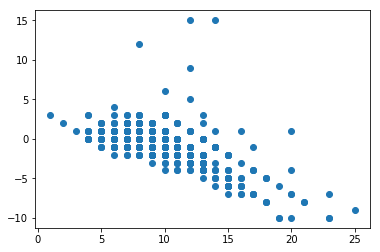

In [74]:
poly1_p15d2 = svm.SVC(kernel='poly', C=2**15, degree=2, class_weight=None).fit(x_train, y_train)
poly1_p15d2_pred=poly1_p15d2.predict(x_test)
res1_polyp15d2 = Result(poly1_p15d2_pred, y_test.values, 1)
res1_polyp15d2.display_totals()
plt.plot(y_test.values, res1_polyp15d2.list_variances, 'o')


In [75]:
res1_polyp15d2.get_confidence_interval(83)

2

In [ ]:
poly1_p15d2 = svm.SVC(kernel='poly', C=2**15-100, degree=2, class_weight=None).fit(x_train, y_train)
poly1_p15d2_pred=poly1_p15d2.predict(x_test)
res1_polyp15d2 = Result(poly1_p15d2_pred, y_test.values, 1)
res1_polyp15d2.display_totals
plt.plot(y_test.values, res1_polyp15d2.list_variances, 'o')

I accidentally printed out the class weight 'balanced' answer and though it's variance is higher there is something to not about the variances. They don't slope down to the right indicating everything is being pulled to the center, particularly at the older ages. 

The problem it seems to have is that it has a tendancy to predict things in the middle ages too high. It is also randomly or probably not randomly the best performing balanced result.

This should be exploitable. I don't know how. 

In [ ]:
poly2_p15d2 = svm.SVC(kernel='poly', C=2**15, degree=2, class_weight='balanced').fit(x_train, y_train)
poly2_p15d2_pred=poly2_p15d2.predict(x_test)
res2_polyp15d2 = Result(poly2_p15d2_pred, y_test.values, 1)
res2_polyp15d2.display_totals()
plt.plot(y_test.values, res2_polyp15d2.list_variances, 'o')

## Gradient Boosting Regression

In [79]:
from funkys_funcs import append_tts

t_sets = []
TEST_DESC = 0
X_TRAIN = 1
Y_TRAIN = 2
X_TEST = 3
Y_TEST = 4

a,b,c,d = train_test_split(data1, data_y, test_size=.2, random_state=17)
D1 = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

a,b,c,d = train_test_split(data2, data_y, test_size=.2, random_state=19)
D2 = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

a,b,c,d = train_test_split(datax, data_y, test_size=.2, random_state=23)
DX = append_tts(a,b,c,d, 'L2 Norm Clip:    ', t_sets)

In [84]:
grb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
y_pred = grb.fit(t_sets[D1][X_TRAIN], t_sets[D1][Y_TRAIN]).predict(t_sets[D1][X_TEST])

res = Result(y_pred, t_sets[D1][Y_TEST].values, .1)

res.display_totals()

Range: 0.1
Correct: 28
Mean Variance: 1.8016512097950317


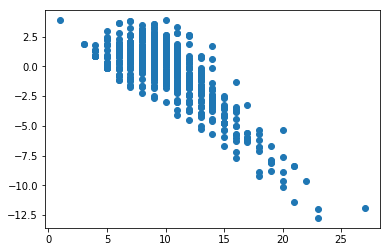

In [87]:
plt.plot(t_sets[D1][Y_TEST], res.list_variances, 'o')